In [1]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import rasterio
import numpy as np
import datetime as dt
from rasterstats import zonal_stats

In [2]:
#Load Data
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\geospatial_internship\\datasets')
telangana_shape = gpd.read_file('telangana_shapefile.geojson')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\DPPD_Jesse')
one_km_grid = gpd.read_file('telangana_1km_grid.geojson')

In [3]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\Landuse_Analysis')


In [20]:
def crop_counts(boundaries, year):
    tiff = '01-01-'+str(year)+'.tif'
    lulc = rasterio.open(tiff, mode = 'r')
    lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
    # affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
    affine = lulc.transform

    cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}
    boundaries['category ' + str(year)] = 0

    for i in range(0, len(boundaries)):
        test = zonal_stats(boundaries.iloc[i].geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, stats = 'majority', categorical=True, category_map = cmap)
        try:
            boundaries['category ' + str(year)].iloc[i] = test[0]['properties']['majority']  
        except:
            boundaries['category ' + str(year)].iloc[i] = 0
        
    return (boundaries)

In [25]:
#grid_2021 = crop_counts(one_km_grid, 2021)
grid_2021.to_file('C:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\Landuse_Analysis\\landuse_df_grid.geojson', driver="GeoJSON")  

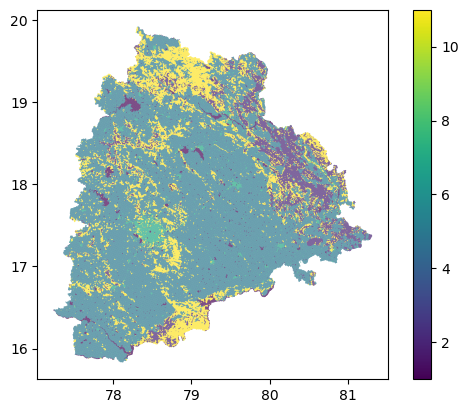

In [24]:
grid_2021.plot(column = 'category 2021', legend = True)
plt.show()